# Machine Learning From Scratch

In [30]:
import numpy as np 
import pandas as pd # data processing, CSV file I/O (pd.read_csv)
import matplotlib.pyplot as plt
import math

In [31]:
# Membaca dataset
data = pd.read_csv("D:/KULIAH/Sem 7/AI/Motor Price.csv")
data

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Yamaha Fazer [2009-2016],25000,2013,Individual,1st owner,120000,84751
1,Hero Maestro Edge,46000,2015,Individual,1st owner,14000,55980
2,Honda CB Hornet 160R,80000,2017,Individual,1st owner,18000,87719
3,Hero Karizma [2003-2014],50000,2013,Individual,1st owner,38000,85766
4,Honda CB Trigger,40000,2014,Individual,1st owner,75000,83437
...,...,...,...,...,...,...,...
395,Honda CB Unicorn 150,50000,2007,Individual,1st owner,46000,74295
396,Yamaha YZF R15 [2011-2018],65000,2013,Individual,1st owner,11000,118997
397,Bajaj Pulsar AS200,60000,2015,Individual,1st owner,50000,92074
398,Honda Activa [2000-2015],20000,2010,Individual,1st owner,50000,50267


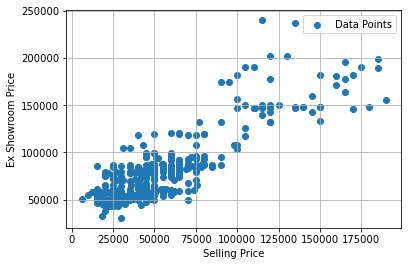

In [32]:
# Plot data selling_price dengan ex_showroom_price

X = data['selling_price'].tolist()
Y = data['ex_showroom_price'].tolist()

plt.scatter(X, Y, label='Data Points')
plt.grid()
plt.xlabel("Selling Price")
plt.ylabel("Ex Showroom Price")
plt.legend()
plt.show()


In [33]:
# Memastikan tidak ada data yang berisi null
data.isnull().sum()

name                 0
selling_price        0
year                 0
seller_type          0
owner                0
km_driven            0
ex_showroom_price    0
dtype: int64

In [17]:
#memisah data untuk training dan testing

data_train = data.head(360)
data_test = data.tail(40)

X_train = data_train['selling_price'].values
Y_train = data_train['ex_showroom_price'].values

X_test = data_test['selling_price'].values
Y_test = data_test['ex_showroom_price'].values


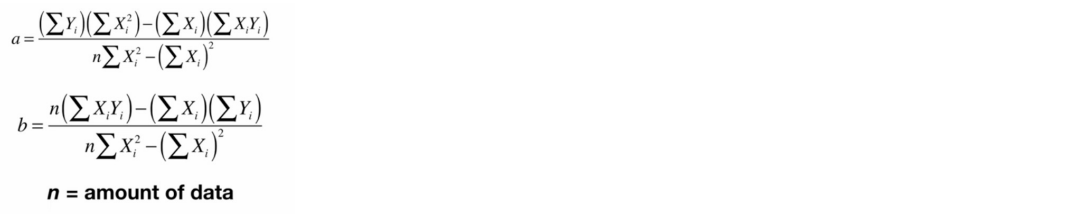

In [34]:
# Mencari nilai Y-intersept(a) dan Slope(b)

np.seterr(all='warn')
X_train = np.array(X_train ,dtype='float64')

n = len(X_train)
def Sum (Train):
    E = 0
    for i in range(n):
        E += Train[i]
    return E

def Sum2 (Train):
    E = 0
    for i in range(n):
        E += Train[i]**2
    return E

def SumXY (Train1, Train2):
    E = 0
    for i in range(n):
        E += Train1[i]*Train2[i]
    return E

Sum_X = Sum(X_train)
Sum_Y = Sum(Y_train)
Sum_X2 = Sum2(X_train)
Sum_Y2 = Sum2(Y_train)
Sum_XY = SumXY(X_train, Y_train)

a = ((Sum_Y*Sum_X2)-(Sum_X*Sum_XY))/(n*Sum_X2-(Sum_X**2))
b = (n*Sum_XY-(Sum_X*Sum_Y))/(n*Sum_X2-(Sum_X**2))

print(f"Y-intersept = {a}")
print(f"Slope = {b}")

Y-intersept = 32104.525445423726
Slope = 0.8857885067779917


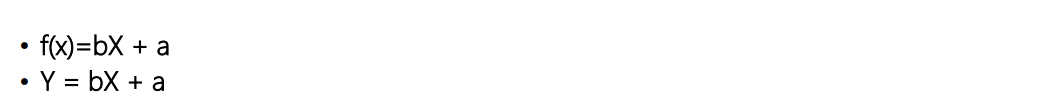

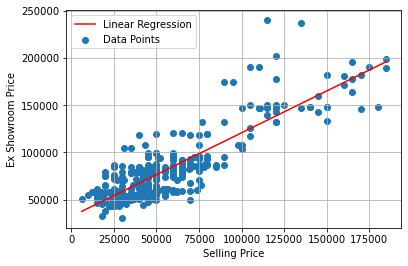

In [35]:
# Mencari garis regresi dan plot dengan data training

X = np.linspace (np.min(X_train), np.max(X_train))
Y = b*X + a

plt.plot(X, Y, color='red',label='Linear Regression')
plt.scatter(X_train, Y_train, label='Data Points')
plt.grid()
plt.xlabel("Selling Price")
plt.ylabel("Ex Showroom Price")
plt.legend()
plt.show()

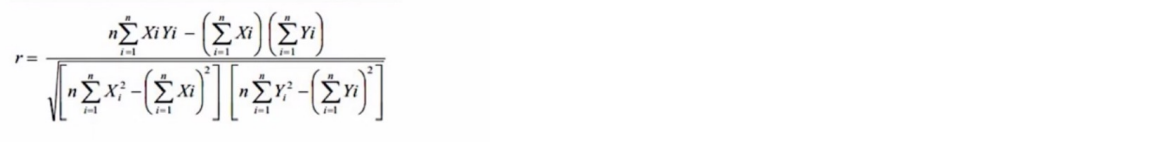

In [36]:
# Menghitung correlation coefficient(r) dan coefficient of determination(r2)

r = ((Sum_X*Sum_Y)-(n*Sum_XY))/math.sqrt(((n*Sum_X2)-(Sum_X**2))*((n*Sum_Y2)-(Sum_Y**2)))
r2 = abs(r)**2

print(f"r  = {abs(r)}")
print(f"r2 = {r2}")

r  = 0.864733289834763
r2 = 0.7477636625484523


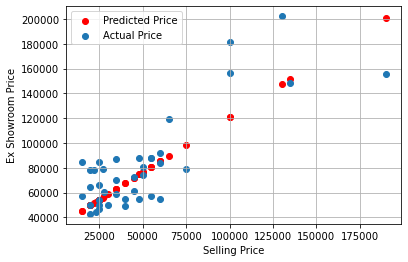

In [37]:
# Plot garis prediksi dengan data test
Y_predic = b*X_test + a

plt.scatter(X_test, Y_predic, color='red', label='Predicted Price')
plt.scatter(X_test, Y_test, label='Actual Price')
plt.grid()
plt.xlabel("Selling Price")
plt.ylabel("Ex Showroom Price")
plt.legend()
plt.show()

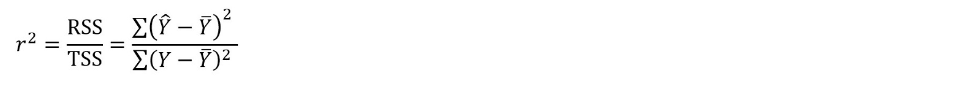

In [38]:
# coefficient of determination 

Mean_Ytest = np.mean(Y_test)
Mean_Ypredic = np.mean(Y_predic)

n2 = len(X_test)
def function_r2 (y, mean):
    func = 0
    for i in range(n2):
        func += (y[i]-mean)**2
    return func

Ytest = b*X_test + a
TSS = function_r2(Y_test, Mean_Ytest)
RSS = function_r2(Ytest, Mean_Ypredic)

r2_test = RSS/TSS
print(f"r2 test = {r2_test}")

r2 test = 0.7344146289007006


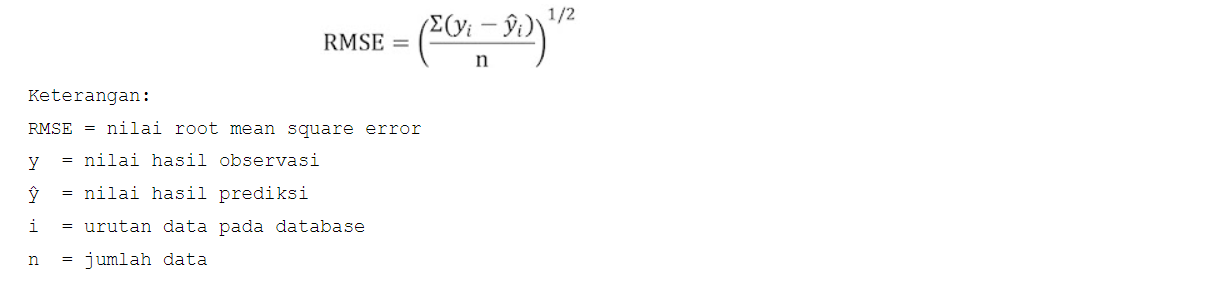

In [39]:
# Root mean square error

def rmse (Yt, Xt):
    RMSE = 0
    for i in range(n2):
        SE = (Yt[i] - (b*Xt[i] + a))**2
    Rmse = math.sqrt(SE/n2)
    return Rmse

RMSE = rmse(Y_test, X_test)

print(f"RMSE = {RMSE}")

RMSE = 3587.791350105904
